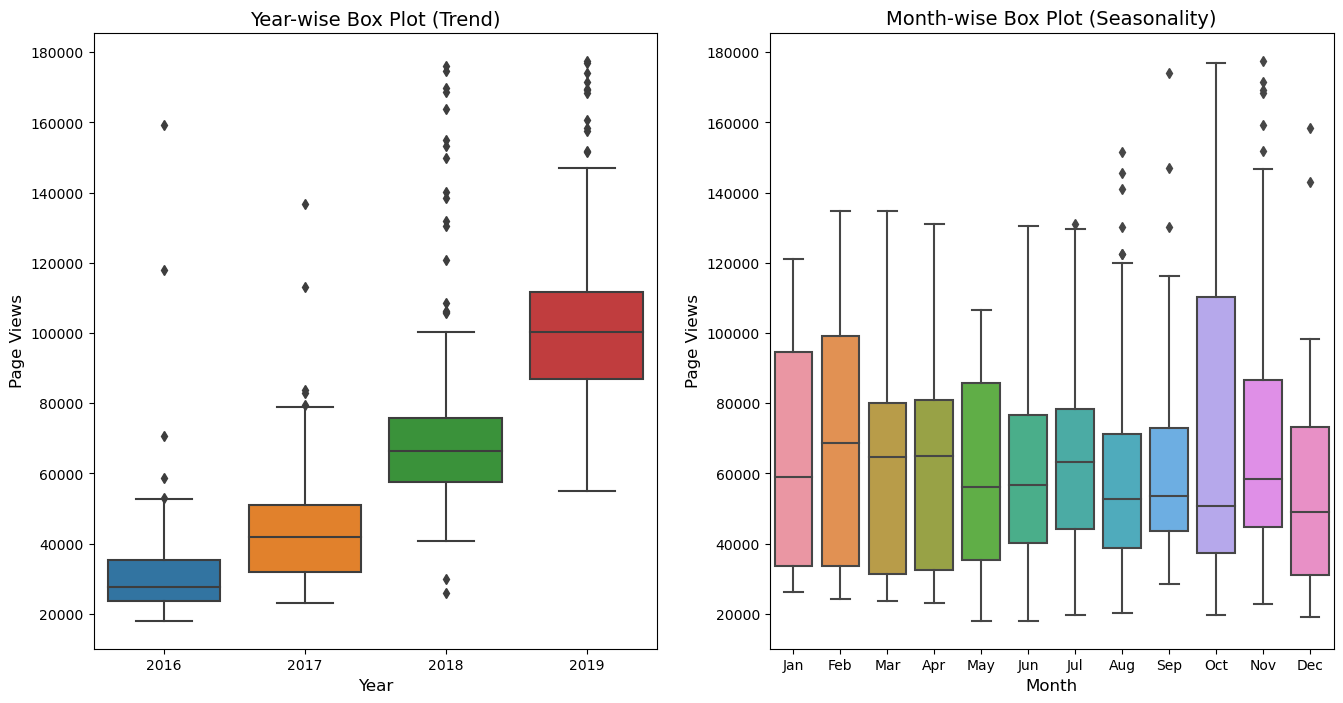

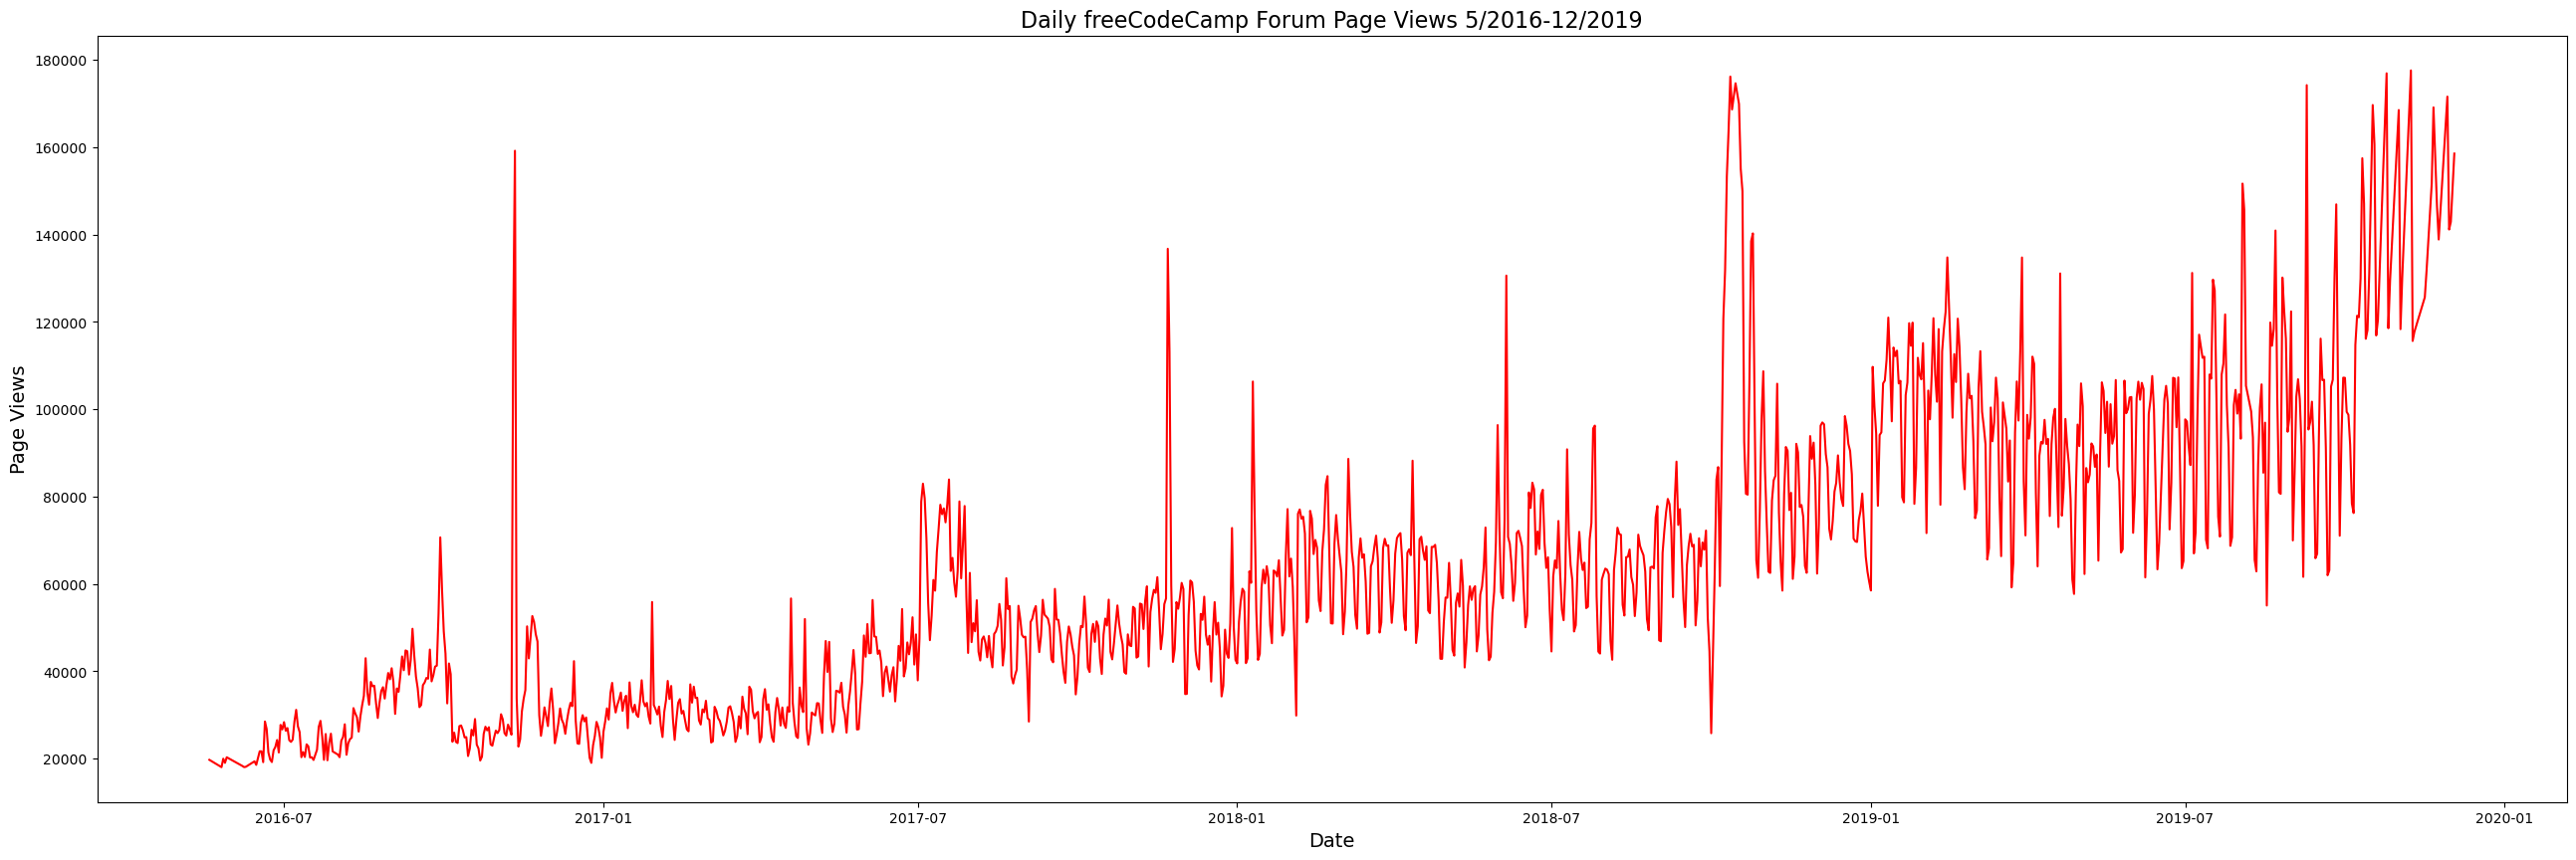

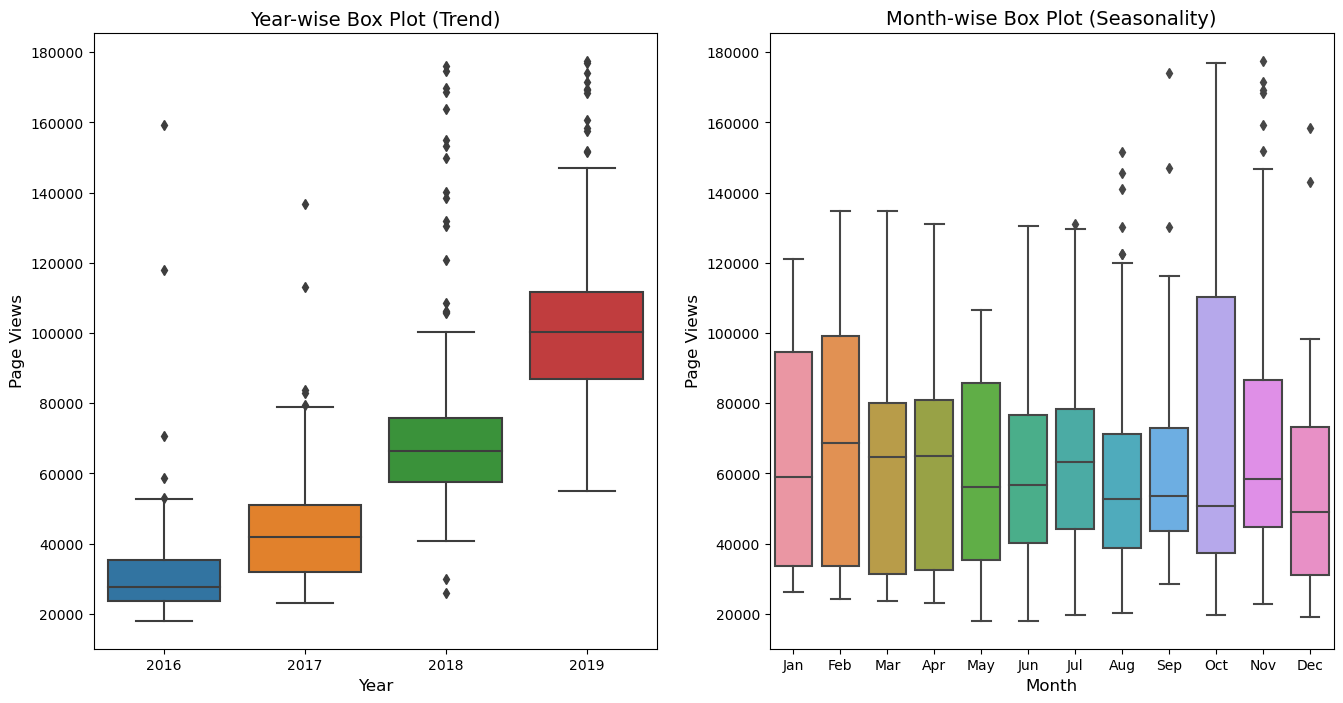

In [9]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates and set index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

# Clean data
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

# Draw line plot
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(32, 10), dpi=100)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', fontsize=16)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Page Views', fontsize=14)
    sns.lineplot(x=df.index, y='value', data=df, ax=ax, color='r')
    
    # Save image and return fig
    fig.savefig('line_plot.png')
    return fig

# Draw bar plot
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    # Group data by year and month and calculate mean
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()
    
    # Set correct month names
    df_bar.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    
    # Plot bar chart
    fig = df_bar.plot(kind='bar', figsize=(15, 10)).figure
    plt.xlabel('Years', fontsize=15)
    plt.ylabel('Average Page Views', fontsize=15)
    plt.legend(loc='upper left', title='Months', fontsize=12)
    plt.xticks(rotation=45)
    


    # Save image and return fig
    fig.savefig('bar_plot.png')
    return fig

# Draw box plot
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    
    # Set correct month order
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df_box['month'] = pd.Categorical(df_box['month'], categories=month_order, ordered=True)
    
    # Draw box plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Year-wise box plot
    sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)', fontsize=14)
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Page Views', fontsize=12)
    
    # Month-wise box plot
    sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=month_order)
    ax2.set_title('Month-wise Box Plot (Seasonality)', fontsize=14)
    ax2.set_xlabel('Month', fontsize=12)
    ax2.set_ylabel('Page Views', fontsize=12)
    
    
    
    # Save image and return fig
    fig.savefig('box_plot.png')
    return fig

draw_line_plot()
draw_box_plot()